In [1]:
import numpy as np 
import pandas as pd 



c:\Users\sahil\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dt = pd.read_csv(r"C:\Users\sahil\OneDrive\Pictures\Documents\OneDrive\Desktop\ClickArmor\Data\Base_Dataset.csv")

In [3]:
dt['label'].value_counts()

label
benign      744357
phishing    539342
Name: count, dtype: int64

## Feature Extraction

##### Feature1 - UrlLen
(Malicious URLs are often longer to hide payloads,redirections, or suspicious parameters.)

In [4]:
#x = dt['label'][0].str.len() 
            #not working here since str functionis only accessible for DataFrames not for single values  
#x = len(dt['label'][0])     
            #len function only counts float, int or truncated version of full string   
print(len(repr(dt['url'][0])))    
            #it counts every element in string even quotes or brackets also , escape charcters like \n   


18


In [5]:
dt['UrlLen']= dt['url'].apply(lambda x:len(repr(x))-2)

In [6]:
dt

,url,label,UrlLen
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235
...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45


#### Feature2-Entropy_URL
Entropy_URL helps detect obfuscated, random-looking, machine-generated URLs.  
URL like https://google.com/login → lower entropy (more readable, fewer unique characters).  
URL like https://x9g7fhz1.com/a8f1%23t2%24 → higher entropy (more symbols, more randomness).

In [7]:
## Entropy of URL
import math
from collections import Counter
# Counter is a class from the collections module that helps you count occurrences
#  of items in a list or string.
def calculate_entropy(url):
    if not url:
        return 0.0
    
    # Count frequency of each character
    char_counts = Counter(url)
    total_length = len(url)

    # Compute entropy
    entropy = -sum((count / total_length) * math.log2(count / total_length)
                   for count in char_counts.values())

    return entropy


In [8]:
"""Efficient entropy calculation for URL strings."""
import math

def Calculate_entropy(url: str) -> float:
    if not url:
        return 0.0
    
    freq = {}
    for char in url:
        freq[char] = freq.get(char, 0) + 1
    
    total_len = len(url)
    entropy = 0.0
    for count in freq.values():
        p = count / total_len
        entropy -= p * math.log2(p)
    
    return entropy


In [9]:
dt['URL_Entropy'] = dt['url'].apply(Calculate_entropy)


In [10]:
dt.head()

,url,label,UrlLen,URL_Entropy
0,br-icloud.com.br,phishing,16,3.375000
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293


### Feature 3:NoOfDots (provides no of dots in URL)
Separates subdomains and domain parts (so Too many dots may signal phshing)

In [11]:
# def Dots_count(string): #O(n),O(1)
#     count = 0
#     for i in string:
#         if i == ".":
#             count += 1
#     return count

In [12]:
Dots_count = lambda s:s.count(".")  #O(n),O(1)
#str.count() is implemented in Optimized C so its faster in practice
# so we will is use this

In [13]:
dt["NoOfDots"]= dt["url"].apply(Dots_count)

In [14]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots
0,br-icloud.com.br,phishing,16,3.375000,2
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2
...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2


#### NoOfSlashes (no of slashes in URL)
it might help us to find is it Copy the layout of real websites or is it legitimate 

In [15]:
dt['NoOfSlashes']=dt['url'].apply(lambda s:s.count("/"))

In [16]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes
0,br-icloud.com.br,phishing,16,3.375000,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3
...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2


#### IsIPaddressinDomain 
(IP address is used instead of a proper domain name in a URL is a critical indicator for phishing or malicious intent)

In [17]:
import re

# Precompile regex
ip_regex = re.compile(r'^(https?://)?(\d{1,3}\.){3}\d{1,3}([:/]?|$)')

def is_ip_address_in_domain(url):
    """
    Returns 1 if the domain of the URL is an IP address, else 0.
    """
    return 1 if ip_regex.match(url) else 0

In [18]:
dt['IsIpAddressinDomain'] = dt['url'].apply(is_ip_address_in_domain)

In [19]:
dt.head()


,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0


In [20]:
dt['IsIpAddressinDomain'].value_counts()

IsIpAddressinDomain
0    1255503
1      28196
Name: count, dtype: int64

def get_entropy(s):
    """Calculate Shannon entropy of a string."""
    if not s:
        return 0
    p, lns = Counter(s), float(len(s))
    return -sum(count / lns * math.log2(count / lns) for count in p.values())

def extract_url_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query
    filename = path.split('/')[-1] if '/' in path else ''
    
    # 1. SymbolCount_URL
    symbol_count = len(re.findall(r'[^\w\s]', url))

    # 2. executable
    is_executable = int(bool(re.search(r'\.(exe|bat|zip|scr|msi|apk)$', filename.lower())))

    # 3. NumberRate_URL
    num_digits = sum(c.isdigit() for c in url)
    number_rate = num_digits / len(url) if len(url) > 0 else 0

    # 4. URL_sensitiveWord
    sensitive_words = ['login', 'secure', 'account', 'banking', 'update', 'verify']
    sensitive_word_flag = int(any(word in url.lower() for word in sensitive_words))

    # 5. Querylength
    query_length = len(query)

    # 6. argPathRatio
    arg_path_ratio = len(query) / len(path) if len(path) > 0 else 0

    # 7. charcompace (Character Complexity = unique chars / total chars)
    charcompace = len(set(url)) / len(url) if len(url) > 0 else 0

    # 8. CharacterContinuityRate (max sequence of same char / url length)
    max_seq = max((len(list(g)) for _, g in groupby(url)), default=1)
    continuity_rate = max_seq / len(url) if len(url) > 0 else 0

    # 9. Entropy_Domain
    domain_entropy = get_entropy(domain)

    # 10. Entropy_Filename
    filename_entropy = get_entropy(filename)

    # 11. pathurlRatio
    pathurl_ratio = len(path) / len(url) if len(url) > 0 else 0

    return pd.Series([
        symbol_count, is_executable, number_rate, sensitive_word_flag,
        query_length, arg_path_ratio, charcompace, continuity_rate,
        domain_entropy, filename_entropy, pathurl_ratio
    ])


In [21]:
# from collections import Counter
# import re

# def extract_sensitive_words(df, label_col='label', url_col='url', top_n=20):
#     phishing_urls = df[df[label_col] == 'phishing'][url_col]

#     # Tokenize URLs (splitting on /, ?, =, -, _, ., etc.)
#     tokens = []
#     for url in phishing_urls:
#         parts = re.split(r'[\/\?\=\-\_\.\&\:\;\%]', url.lower())
#         tokens.extend([token for token in parts if token.isalpha() and len(token) > 2])

#     # Count most common suspicious tokens
#     token_counts = Counter(tokens)
#     return [word for word, count in token_counts.most_common(top_n)]


In [22]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0
...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0


In [23]:
# import re
# from collections import Counter

# def extract_sensitive_words_with_freq(df):
#     # Tokenizer function inside
#     def tokenize_url(url):
#         # Split URL into words
#         return [t for t in re.split(r'[\/\?\=\-\_\.\&\:\;\%]', url.lower()) if t and t.isalpha()]

#     # Separate phishing vs benign URLs
#     phishing_tokens = []
#     benign_tokens = []
    
#     for _, row in df.iterrows():
#         tokens = tokenize_url(row['url'])
#         if row['label'] == 'phishing':
#             phishing_tokens.extend(tokens)
#         else:
#             benign_tokens.extend(tokens)
    
#     # Count frequencies
#     phishing_freq = Counter(phishing_tokens)
#     benign_freq = Counter(benign_tokens)
    
#     # Find sensitive words = words that appear more in phishing than benign
#     sensitive_words = {}
#     for word, count in phishing_freq.items():
#         if count > benign_freq.get(word, 0):  
#             sensitive_words[word] = count  
    
#     return sensitive_words


In [24]:
import re
import pandas as pd
from collections import Counter

def extract_sensitive_words_with_freq(df, ratio_threshold=2):
    # Tokenizer function
    def tokenize_url(url):
        return [t for t in re.split(r'[\/\?\=\-\_\.\&\:\;\%]', url.lower()) if t]

    # Apply tokenization to all URLs at once
    df['tokens'] = df['url'].apply(tokenize_url)

    # Separate phishing and benign tokens using explode
    phishing_tokens = df[df['label'] == 'phishing']['tokens'].explode()
    benign_tokens = df[df['label'] == 'benign']['tokens'].explode()

    # Count frequencies
    phishing_freq = Counter(phishing_tokens.dropna())
    benign_freq = Counter(benign_tokens.dropna())

    # Extract sensitive words based on ratio
    sensitive_words = {}
    for word, p_count in phishing_freq.items():
        b_count = benign_freq.get(word, 0)
        if p_count / (b_count + 1) >= ratio_threshold:
            sensitive_words[word] = {
                'phishing_count': p_count,
                'benign_count': b_count,
                'ratio': p_count / (b_count + 1)
            }

    # Sort by ratio descending
    sensitive_words = dict(sorted(sensitive_words.items(), key=lambda x: x[1]['ratio'], reverse=True))

    return sensitive_words


In [25]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0
...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0


In [26]:
sensitive_words = extract_sensitive_words_with_freq(dt)


In [27]:
sensitive_words 

{'mozi': {'phishing_count': 8358, 'benign_count': 0, 'ratio': 8358.0},
 'ietf': {'phishing_count': 6448, 'benign_count': 0, 'ratio': 6448.0},
 'mixh': {'phishing_count': 5778, 'benign_count': 0, 'ratio': 5778.0},
 'mitsui': {'phishing_count': 5758, 'benign_count': 0, 'ratio': 5758.0},
 'jyuku': {'phishing_count': 5758, 'benign_count': 0, 'ratio': 5758.0},
 '1774256418': {'phishing_count': 3531, 'benign_count': 0, 'ratio': 3531.0},
 '000webhostapp': {'phishing_count': 3371, 'benign_count': 0, 'ratio': 3371.0},
 'sejeal': {'phishing_count': 2568, 'benign_count': 0, 'ratio': 2568.0},
 'apbfiber': {'phishing_count': 2294, 'benign_count': 0, 'ratio': 2294.0},
 'openme': {'phishing_count': 2292, 'benign_count': 0, 'ratio': 2292.0},
 '1252899642': {'phishing_count': 2229, 'benign_count': 0, 'ratio': 2229.0},
 '13inboxlight': {'phishing_count': 2081, 'benign_count': 0, 'ratio': 2081.0},
 'sbidiot': {'phishing_count': 1964, 'benign_count': 0, 'ratio': 1964.0},
 'appleid': {'phishing_count': 147

In [28]:
import re

def add_sensitive_word_feature(df, sensitive_words):
    # Precompile regex for splitting
    pattern = re.compile(r'[\/\?\=\-\_\.\&\:\;\%]')
    
    # Convert sensitive_words to a set for O(1) lookup
    sensitive_set = set(sensitive_words)

    def count_sensitive_words(url):
        tokens = [t for t in pattern.split(url.lower()) if t]  # tokenization
        return sum(1 for t in tokens if t in sensitive_set)     # count matches

    df['SensitiveWordCount'] = df['url'].apply(count_sensitive_words)
    return df



In [29]:
dt = add_sensitive_word_feature(dt,sensitive_words)

In [30]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,tokens,SensitiveWordCount
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,"[br, icloud, com, br]",3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,"[mp3raid, com, music, krizz, kaliko, html]",0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,"[bopsecrets, org, rexroth, cr, 1, htm]",1
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,"[http, www, garage, pirenne, be, index, php, o...",12
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,"[http, adventure, nicaragua, net, index, php, ...",11
...,...,...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0,"[xbox360, ign, com, objects, 850, 850402, html]",2
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0,"[games, teamxbox, com, xbox, 360, 1860, dead, ...",2
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0,"[www, gamespot, com, xbox360, action, deadspace]",2
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0,"[en, wikipedia, org, wiki, dead, space, (video...",0


In [31]:
dt["SensitiveWordCount"].value_counts()

SensitiveWordCount
0     519394
1     193228
2     126186
3      93533
4      64338
       ...  
90         1
78         1
69         1
68         1
92         1
Name: count, Length: 80, dtype: int64

In [32]:
import pandas as pd
import re
import numpy as np
import math
from urllib.parse import urlparse
from collections import Counter
from itertools import groupby
from tqdm import tqdm

tqdm.pandas()  # enables progress bar with apply

def get_entropy(s):
    """Calculate Shannon entropy of a string."""
    if not s:
        return 0
    p, lns = Counter(s), float(len(s))
    return -sum(count / lns * math.log2(count / lns) for count in p.values())

def extract_url_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query
    filename = path.split('/')[-1] if '/' in path else ''

    # 1. SymbolCount_URL
    symbol_count = len(re.findall(r'[^\w\s]', url))

    # 2. executable
    is_executable = int(bool(re.search(r'\.(exe|bat|zip|scr|msi|apk)$', filename.lower())))

    # 3. NumberRate_URL
    num_digits = sum(c.isdigit() for c in url)
    number_rate = num_digits / len(url) if len(url) > 0 else 0

    # 5. Querylength
    query_length = len(query)

    # 6. argPathRatio
    arg_path_ratio = len(query) / len(path) if len(path) > 0 else 0

    # 7. charcompace (Character Complexity = unique chars / total chars)
    charcompace = len(set(url)) / len(url) if len(url) > 0 else 0

    # 8. CharacterContinuityRate (max sequence of same char / url length)
    max_seq = max((len(list(g)) for _, g in groupby(url)), default=1)
    continuity_rate = max_seq / len(url) if len(url) > 0 else 0

    # 9. Entropy_Domain
    domain_entropy = get_entropy(domain)

    # 10. Entropy_Filename
    filename_entropy = get_entropy(filename)

    # 11. pathurlRatio
    pathurl_ratio = len(path) / len(url) if len(url) > 0 else 0

    return [
        symbol_count, is_executable, number_rate,
        query_length, arg_path_ratio, charcompace, continuity_rate,
        domain_entropy, filename_entropy, pathurl_ratio]
    


In [33]:
feature_columns = [
    'SymbolCount_URL', 'executable', 'NumberRate_URL',
    'Querylength', 'argPathRatio', 'charcompace', 'CharacterContinuityRate',
    'Entropy_Domain', 'Entropy_Filename', 'pathurlRatio'
]

dt[feature_columns] = dt['url'].progress_apply(extract_url_features).apply(pd.Series)

100%|██████████| 1283699/1283699 [01:32<00:00, 13825.77it/s]


In [34]:
dt.head()

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,tokens,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,Querylength,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,"[br, icloud, com, br]",3,3.0,0.0,0.000000,0.0,0.0,0.687500,0.062500,0.000000,0.000000,1.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,"[mp3raid, com, music, krizz, kaliko, html]",0,4.0,0.0,0.028571,0.0,0.0,0.542857,0.057143,0.000000,3.454822,1.000000
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,"[bopsecrets, org, rexroth, cr, 1, htm]",1,5.0,0.0,0.032258,0.0,0.0,0.483871,0.032258,0.000000,2.321928,1.000000
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,"[http, www, garage, pirenne, be, index, php, o...",12,16.0,0.0,0.079545,49.0,4.9,0.352273,0.034091,3.308751,2.947703,0.113636
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,"[http, adventure, nicaragua, net, index, php, ...",11,13.0,0.0,0.093617,194.0,19.4,0.251064,0.008511,3.501398,2.947703,0.042553


In [35]:
dt.drop('tokens',axis=1,inplace=True)

In [36]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,Querylength,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,3,3.0,0.0,0.000000,0.0,0.0,0.687500,0.062500,0.000000,0.000000,1.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,0,4.0,0.0,0.028571,0.0,0.0,0.542857,0.057143,0.000000,3.454822,1.000000
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1,5.0,0.0,0.032258,0.0,0.0,0.483871,0.032258,0.000000,2.321928,1.000000
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,12,16.0,0.0,0.079545,49.0,4.9,0.352273,0.034091,3.308751,2.947703,0.113636
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,11,13.0,0.0,0.093617,194.0,19.4,0.251064,0.008511,3.501398,2.947703,0.042553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0,2,6.0,0.0,0.307692,0.0,0.0,0.589744,0.025641,0.000000,3.277613,1.000000
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0,2,8.0,0.0,0.159091,0.0,0.0,0.500000,0.022727,0.000000,0.000000,1.000000
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0,2,6.0,0.0,0.071429,0.0,0.0,0.476190,0.071429,0.000000,0.000000,1.000000
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0,0,6.0,0.0,0.000000,0.0,0.0,0.466667,0.022222,0.000000,3.675311,1.000000


In [38]:

def extract_url_features1(df):
    # 1. HasRedirection
    df['HasRedirection'] = df['url'].apply(lambda x: 1 if '//' in x.split('//', 1)[-1] else 0)

    # 2. HasAtSymbol
    df['HasAtSymbol'] = df['url'].apply(lambda x: 1 if '@' in x else 0)

    # 3. HasHyphenInDomain
    df['HasHyphenInDomain'] = df['url'].apply(lambda x: 1 if '-' in urlparse(x).netloc else 0)
    return df

    # 4. NumSubDomains

def count_subdomains(url):
    try:
        hostname = urlparse(url).hostname
        if hostname:
            return max(0, hostname.count('.') - 1)  # clamp at 0
        return 0
    except:
        return 0

dt['NumSubDomains'] = dt['url'].apply(count_subdomains)


In [39]:
dt = extract_url_features1(dt)


In [40]:
dt

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,...,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,3,3.0,0.0,...,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,0,4.0,0.0,...,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1,5.0,0.0,...,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,12,16.0,0.0,...,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,11,13.0,0.0,...,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283694,xbox360.ign.com/objects/850/850402.html,phishing,39,4.355539,3,3,0,2,6.0,0.0,...,0.0,0.589744,0.025641,0.000000,3.277613,1.000000,0,0,0,0
1283695,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,4.243300,2,4,0,2,8.0,0.0,...,0.0,0.500000,0.022727,0.000000,0.000000,1.000000,0,0,0,0
1283696,www.gamespot.com/xbox360/action/deadspace/,phishing,42,4.147921,2,4,0,2,6.0,0.0,...,0.0,0.476190,0.071429,0.000000,0.000000,1.000000,0,0,0,0
1283697,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,4.102313,2,2,0,0,6.0,0.0,...,0.0,0.466667,0.022222,0.000000,3.675311,1.000000,0,0,0,0


In [41]:
dt.head()

,url,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,...,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,br-icloud.com.br,phishing,16,3.375000,2,0,0,3,3.0,0.0,...,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4.079143,2,2,0,0,4.0,0.0,...,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3.708093,2,3,0,1,5.0,0.0,...,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,4.660343,3,3,0,12,16.0,0.0,...,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,5.491293,2,3,0,11,13.0,0.0,...,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1


### SSL Certificate Check
what it does : Verifies if the site uses a valid and trusted SSL Certificate    
what it matters: Most phishing sites dont bother with proper certificates or use self 

In [42]:
# import ssl, socket

# def has_valid_ssl(domain):
#     context = ssl.create_default_context()
#     try:
#         with socket.create_connection((domain, 443), timeout=5) as sock:
#             with context.wrap_socket(sock, server_hostname=domain) as ssock:
#                 cert = ssock.getpeercert()
#                 return True
#     except:
#         return False


In [43]:
# dt['has_valid_ssl'] =dt['url'].apply(has_valid_ssl)

In [44]:

# import whois
# from datetime import datetime

# def get_domain_age(domain):
#     try:
#         w = whois.whois(domain)
#         creation_date = w.creation_date
#         if isinstance(creation_date, list):
#             creation_date = creation_date[0]
#         return (datetime.now() - creation_date).days
#     except:
#         return -1  # Unable to fetch


In [45]:
#dt['has_valid_ssl'] =dt['url'].apply(has_valid_ssl)

In [46]:
dt.head

<bound method NDFrame.head of                                                        url     label  UrlLen  \
0                                         br-icloud.com.br  phishing      16   
1                      mp3raid.com/music/krizz_kaliko.html    benign      35   
2                          bopsecrets.org/rexroth/cr/1.htm    benign      31   
3        http://www.garage-pirenne.be/index.php?option=...  phishing      88   
4        http://adventure-nicaragua.net/index.php?optio...  phishing     235   
...                                                    ...       ...     ...   
1283694            xbox360.ign.com/objects/850/850402.html  phishing      39   
1283695       games.teamxbox.com/xbox-360/1860/Dead-Space/  phishing      44   
1283696         www.gamespot.com/xbox360/action/deadspace/  phishing      42   
1283697      en.wikipedia.org/wiki/Dead_Space_(video_game)  phishing      45   
1283698          www.angelfire.com/goth/devilmaycrytonite/  phishing      41   

         

In [47]:
dt.drop("url",axis=1,inplace=True)

In [48]:
dt['label'].value_counts()

label
benign      744357
phishing    539342
Name: count, dtype: int64

In [49]:
dt['label'] = dt['label'].map({'phishing':1,'benign':0})

In [50]:
numerical_cols = dt.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Categorical columns
categorical_cols = dt.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['label', 'UrlLen', 'URL_Entropy', 'NoOfDots', 'NoOfSlashes', 'IsIpAddressinDomain', 'SensitiveWordCount', 'SymbolCount_URL', 'executable', 'NumberRate_URL', 'Querylength', 'argPathRatio', 'charcompace', 'CharacterContinuityRate', 'Entropy_Domain', 'Entropy_Filename', 'pathurlRatio', 'NumSubDomains', 'HasRedirection', 'HasAtSymbol', 'HasHyphenInDomain']
Categorical Columns: []


In [51]:
dt.headabcd

AttributeError: 'DataFrame' object has no attribute 'headabcd'

In [ ]:
X = dt.drop('label',axis=1)
y = dt['label']

In [ ]:
X

,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,Querylength,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,16,3.375000,2,0,0,3,3.0,0.0,0.000000,0.0,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,35,4.079143,2,2,0,0,4.0,0.0,0.028571,0.0,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,31,3.708093,2,3,0,1,5.0,0.0,0.032258,0.0,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,88,4.660343,3,3,0,12,16.0,0.0,0.079545,49.0,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,235,5.491293,2,3,0,11,13.0,0.0,0.093617,194.0,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283694,39,4.355539,3,3,0,2,6.0,0.0,0.307692,0.0,0.0,0.589744,0.025641,0.000000,3.277613,1.000000,0,0,0,0
1283695,44,4.243300,2,4,0,2,8.0,0.0,0.159091,0.0,0.0,0.500000,0.022727,0.000000,0.000000,1.000000,0,0,0,0
1283696,42,4.147921,2,4,0,2,6.0,0.0,0.071429,0.0,0.0,0.476190,0.071429,0.000000,0.000000,1.000000,0,0,0,0
1283697,45,4.102313,2,2,0,0,6.0,0.0,0.000000,0.0,0.0,0.466667,0.022222,0.000000,3.675311,1.000000,0,0,0,0


In [ ]:
y

0          1
1          0
2          0
3          1
4          1
          ..
1283694    1
1283695    1
1283696    1
1283697    1
1283698    1
Name: label, Length: 1283699, dtype: int64

In [ ]:
# dt.drop(["tokens"],axis=1,inplace= True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
dt

,label,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,...,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
0,1,16,3.375000,2,0,0,3,3.0,0.0,0.000000,...,0.0,0.687500,0.062500,0.000000,0.000000,1.000000,0,0,0,0
1,0,35,4.079143,2,2,0,0,4.0,0.0,0.028571,...,0.0,0.542857,0.057143,0.000000,3.454822,1.000000,0,0,0,0
2,0,31,3.708093,2,3,0,1,5.0,0.0,0.032258,...,0.0,0.483871,0.032258,0.000000,2.321928,1.000000,0,0,0,0
3,1,88,4.660343,3,3,0,12,16.0,0.0,0.079545,...,4.9,0.352273,0.034091,3.308751,2.947703,0.113636,1,0,0,1
4,1,235,5.491293,2,3,0,11,13.0,0.0,0.093617,...,19.4,0.251064,0.008511,3.501398,2.947703,0.042553,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283694,1,39,4.355539,3,3,0,2,6.0,0.0,0.307692,...,0.0,0.589744,0.025641,0.000000,3.277613,1.000000,0,0,0,0
1283695,1,44,4.243300,2,4,0,2,8.0,0.0,0.159091,...,0.0,0.500000,0.022727,0.000000,0.000000,1.000000,0,0,0,0
1283696,1,42,4.147921,2,4,0,2,6.0,0.0,0.071429,...,0.0,0.476190,0.071429,0.000000,0.000000,1.000000,0,0,0,0
1283697,1,45,4.102313,2,2,0,0,6.0,0.0,0.000000,...,0.0,0.466667,0.022222,0.000000,3.675311,1.000000,0,0,0,0


In [ ]:
X_train

,UrlLen,URL_Entropy,NoOfDots,NoOfSlashes,IsIpAddressinDomain,SensitiveWordCount,SymbolCount_URL,executable,NumberRate_URL,Querylength,argPathRatio,charcompace,CharacterContinuityRate,Entropy_Domain,Entropy_Filename,pathurlRatio,NumSubDomains,HasRedirection,HasAtSymbol,HasHyphenInDomain
242050,23,3.827910,1,2,0,0,3.0,0.0,0.000000,0.0,0.000000,0.652174,0.043478,0.000000,0.000000,1.000000,0,0,0,0
1263855,51,4.069511,2,3,0,3,5.0,0.0,0.000000,0.0,0.000000,0.392157,0.058824,0.000000,0.000000,1.000000,0,0,0,0
616535,22,3.516028,4,1,0,1,5.0,0.0,0.000000,0.0,0.000000,0.590909,0.136364,0.000000,2.725481,1.000000,0,0,0,0
100068,47,4.390141,3,1,0,1,6.0,0.0,0.127660,8.0,0.210526,0.531915,0.021277,0.000000,3.324863,0.808511,0,0,0,0
139028,48,4.545915,1,3,0,0,5.0,0.0,0.312500,0.0,0.000000,0.562500,0.041667,0.000000,2.599581,1.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,45,4.444755,3,1,0,3,8.0,0.0,0.044444,14.0,0.466667,0.555556,0.044444,0.000000,2.641604,0.666667,0,0,0,0
259178,15,3.773557,1,0,0,1,1.0,0.0,0.200000,0.0,0.000000,0.933333,0.133333,0.000000,0.000000,1.000000,0,0,0,0
131932,53,4.541244,2,3,0,0,5.0,0.0,0.132075,0.0,0.000000,0.528302,0.037736,0.000000,3.506891,1.000000,0,0,0,0
671155,84,4.311554,6,5,0,0,13.0,0.0,0.011905,0.0,0.000000,0.309524,0.035714,3.841171,2.725481,0.369048,4,0,0,0


In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9487388019007557
[[179569   6477]
 [  9974 124905]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    186046
           1       0.95      0.93      0.94    134879

    accuracy                           0.95    320925
   macro avg       0.95      0.95      0.95    320925
weighted avg       0.95      0.95      0.95    320925



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# param_grid = [
#     {'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['l2'], 'C': [0.1, 1, 10]},
#     {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
#     {'solver': ['saga'], 'penalty': ['elasticnet'], 'C': [0.1, 1, 10], 'l1_ratio': [0.5, 0.7, 0.9]},
#     {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
# ]

# grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# print("Best Params:", grid.best_params_)
# print("Best Score:", grid.best_score_)

In [ ]:
# from sklearn.naive_bayes import GaussianNB     # For continuous features (assumes normal distribution)
# from sklearn.naive_bayes import MultinomialNB  # For count data (e.g., text classification)
# from sklearn.naive_bayes import BernoulliNB    # For binary/boolean features
# from sklearn.naive_bayes import CategoricalNB 

In [ ]:
# GNB = GaussianNB()
# MNB = MultinomialNB()
# BNB = BernoulliNB() 
# CNB = CategoricalNB()

In [ ]:
# GNB.fit(X_train,y_train)
# y_pred2 = GNB.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))
# output 0.6691220690192412

In [ ]:

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train_scaled, y_train)
# y_pred3 = MNB.predict(X_test_scaled)

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# print(accuracy_score(y_test, y_pred3))
# print(confusion_matrix(y_test, y_pred3))
# print(classification_report(y_test, y_pred3))
# 0.6550097374776038


In [ ]:
# BNB.fit(X_train,y_train)
# y_pred3 = BNB.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(classification_report(y_test,y_pred3))

In [ ]:
# CNB.fit(X_train_scaled,y_train)
# y_pred4 = CNB.predict(X_test_scaled)
# print(accuracy_score(y_test,y_pred4))
# print(confusion_matrix(y_test,y_pred4))
# print(classification_report(y_test,y_pred4))
# 0.6518781646802212

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is in a pandas DataFrame called df
# (If it's numpy array, I’ll show that too below)

# 1. Check if any column contains negative values
negative_cols = dt.columns[(dt < 0).any()].tolist()
print("Columns with negative values:", negative_cols)

# 2. Count of negative values per column
neg_counts = (dt < 0).sum()
print("\nCount of negative values in each column:\n", neg_counts[neg_counts > 0])

# 3. If dataset is NumPy array (say X_train)
neg_features = np.where((X_train < 0).any(axis=0))[0]
print("\nFeature indices with negative values:", neg_features)


Columns with negative values: []

Count of negative values in each column:
 Series([], dtype: int64)

Feature indices with negative values: []


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth= 44,min_samples_leaf =1,min_samples_split = 2)

In [ ]:
# DecisionTree.fit(X_train,y_train)
# y_pred5 = DecisionTree.predict(X_test)
# print(accuracy_score(y_test,y_pred5))
# print(confusion_matrix(y_test,y_pred5))
# print(classification_report(y_test,y_pred5))

In [ ]:
# train_acc = DecisionTree.score(X_train, y_train)
# test_acc = DecisionTree.score(X_test, y_test)



In [ ]:
# import joblib
# # save model 
# joblib.dump(DecisionTree,"DecisionTree.joblib")

In [ ]:
# DecisionTree.feature_importances_
#IsIpAddressinDomain,executable,HasRedirection,HasAtSymbol as per Decision Tree this features are not contributing much

In [ ]:
## check correlation between features
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from scipy.stats import randint

# # Example: random distributions instead of fixed grids
# param_dist = {
#     'max_depth': randint(5, 50),
#     'min_samples_split': randint(2, 50),
#     'min_samples_leaf': randint(1, 20),
#     'criterion': ['gini', 'entropy']
# }

# dt = DecisionTreeClassifier()
# random_search = RandomizedSearchCV(
#     estimator=dt,
#     param_distributions=param_dist,
#     n_iter=50,          # only 50 random combinations instead of all
#     cv=3,               # use 3-fold instead of 5 to save time
#     scoring='accuracy',
#     n_jobs=-1,          # parallel execution (use all cores)
#     random_state=42
# )

# random_search.fit(X, y)
# print("Best Params:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

# # output 
# Best Params: {'criterion': 'gini', 'max_depth': 43, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Best Score: 0.900987640161801

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# # randint(low, high) defines a discrete uniform distribution over integers in the range [low, high).
# # When used in hyperparameter tuning (like RandomizedSearchCV), it tells sklearn to sample random integers from that range for each trial.
# param_dist = {
#     'max_depth': randint(5, 50),
#     'min_samples_split': randint(2, 50),
#     'min_samples_leaf': randint(1, 20),
#     'criterion': ['gini', 'entropy']}

In [ ]:
# # Step 1: Use RandomizedSearch to get a "good region"
# random_search = RandomizedSearchCV(
#     dt, param_dist,
#     n_iter=200,  # more samples
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     n_jobs=-1,
#     error_score='raise'  # will stop at the first invalid combination
# )
# random_search.fit(X, y)

# # Step 2: Define a refined grid near the best result
# best = random_search.best_params_
# param_grid = {
#     'max_depth': range(best['max_depth']-2, best['max_depth']+3),
#     'min_samples_split': range(best['min_samples_split']-2, best['min_samples_split']+3),
#     'min_samples_leaf': range(best['min_samples_leaf']-2, best['min_samples_leaf']+3),
#     'criterion': [best['criterion']]
# }

# grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X, y)
# print("Final Best Params:", grid_search.best_params_)
# print("Final Best Score:", grid_search.best_score_)




# Final Best Params: {'criterion': 'gini', 'max_depth': 44, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Final Best Score: 0.9349652730309254

In [ ]:
# y_proba = DecisionTree.predict_proba(X_test)[:,1]
# y_pred_new = (y_proba>0.6).astype(int)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve

# # 1. Get prediction probabilities for positive class
# y_scores = DecisionTree.predict_proba(X_test)[:, 1]

# # 2. Compute precision, recall, thresholds
# precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# # 3. Plot Precision and Recall vs Threshold
# plt.figure(figsize=(10,6))
# plt.plot(thresholds, precision[:-1], "b--", label="Precision")
# plt.plot(thresholds, recall[:-1], "g-", label="Recall")
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.title("Precision and Recall vs Threshold")
# plt.legend(loc="best")
# plt.grid(True)
# plt.show()


In [ ]:
# import numpy as np
# from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix

# def find_best_threshold(y_true, y_scores, min_precision=None, strategy="f1"):
#     """
#     y_true: actual labels
#     y_scores: predicted probabilities for positive class
#     min_precision: optional, if you want precision >= some value (e.g. 0.95)
#     strategy: "f1", "precision", or "recall"
#     """
    
#     precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    
#     best_threshold = 0.5
#     best_score = -1
    
#     for t, p, r in zip(thresholds, precision[:-1], recall[:-1]):
#         if min_precision and p < min_precision:
#             continue  # skip if precision not high enough
        
#         if strategy == "f1":
#             score = 2 * (p * r) / (p + r) if (p + r) > 0 else 0
#         elif strategy == "precision":
#             score = p
#         elif strategy == "recall":
#             score = r
#         else:
#             raise ValueError("Unknown strategy")
        
#         if score > best_score:
#             best_score = score
#             best_threshold = t
    
#     # Final evaluation with chosen threshold
#     y_pred = (y_scores >= best_threshold).astype(int)
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
#     print(f"Best threshold = {best_threshold:.3f}")
#     print(f"Precision = {precision[np.argmin(np.abs(thresholds - best_threshold))]:.3f}")
#     print(f"Recall = {recall[np.argmin(np.abs(thresholds - best_threshold))]:.3f}")
#     print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    
#     return best_threshold


In [ ]:
# # Get probabilities from your decision tree
# y_scores = model.predict_proba(X_test)[:, 1]

# # Example 1: Find threshold that maximizes F1
# best_t = find_best_threshold(y_test, y_scores, strategy="f1")

# # Example 2: Find threshold with precision >= 0.95
# best_t = find_best_threshold(y_test, y_scores, min_precision=0.95)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Train model
# rf_model = RandomForestClassifier(
#     n_estimators=200, 
#     max_depth=None, 
#     random_state=42
# )
# rf_model.fit(X_train, y_train)

# y_pred6 = rf_model.predict(X_test)

In [ ]:
# print(accuracy_score(y_test,y_pred6))
# print(confusion_matrix(y_test,y_pred6))
# print(classification_report(y_test,y_pred6))

In [ ]:
# train_acc = rf_model.score(X_train, y_train)
# test_acc = rf_model.score(X_test, y_test)

# print("Training Accuracy:", train_acc)
# print("Testing Accuracy:", test_acc)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dataset in LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',        # for classification
    'boosting_type': 'gbdt',      # Gradient Boosting Decision Tree
    'metric': 'binary_logloss',   # or 'auc'
    'num_leaves': 31,             # controls complexity
    'learning_rate': 0.05,        # step size shrinkage
    'feature_fraction': 0.9,      # subsample features
    'bagging_fraction': 0.8,      # subsample rows
    'bagging_freq': 5,            # perform bagging every k iterations
    'n_jobs': -1,                 # use all CPU cores
    'verbose': -1
}

# Train model
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Define model
import lightgbm as lgb

# Create dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Define parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'binary_logloss',
    'verbose': -1
}

# Train with early stopping via callbacks
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
)

# Predictions
# Use validation set
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

# Convert probabilities to binary labels
y_pred_labels = (y_pred > 0.5).astype(int)




Training until validation scores don't improve for 50 rounds
[100]	training's binary_logloss: 0.0843041	valid_1's binary_logloss: 0.08452
[200]	training's binary_logloss: 0.066159	valid_1's binary_logloss: 0.0664435
[300]	training's binary_logloss: 0.0608318	valid_1's binary_logloss: 0.061566
[400]	training's binary_logloss: 0.0573204	valid_1's binary_logloss: 0.0585317
[500]	training's binary_logloss: 0.0545564	valid_1's binary_logloss: 0.056219
[600]	training's binary_logloss: 0.0524318	valid_1's binary_logloss: 0.0545649
[700]	training's binary_logloss: 0.0506238	valid_1's binary_logloss: 0.0532253
[800]	training's binary_logloss: 0.0490163	valid_1's binary_logloss: 0.0520696
[900]	training's binary_logloss: 0.0475812	valid_1's binary_logloss: 0.0510692
[1000]	training's binary_logloss: 0.0463623	valid_1's binary_logloss: 0.050218
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.0463623	valid_1's binary_logloss: 0.050218


In [ ]:

print("Accuracy:", accuracy_score(y_val, y_pred_labels))
print(confusion_matrix(y_val, y_pred_labels))
print(classification_report(y_val, y_pred_labels))

Accuracy: 0.9817324920152684
[[146486   2354]
 [  2336 105564]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    148840
           1       0.98      0.98      0.98    107900

    accuracy                           0.98    256740
   macro avg       0.98      0.98      0.98    256740
weighted avg       0.98      0.98      0.98    256740



In [ ]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'n_jobs': -1,
    'verbose': -1
}


In [ ]:
from lightgbm import early_stopping, log_evaluation

model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=2000,
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(100)]
)




Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0243593
[200]	valid_0's binary_error: 0.021068
[300]	valid_0's binary_error: 0.0197048
[400]	valid_0's binary_error: 0.0186843
[500]	valid_0's binary_error: 0.018065
[600]	valid_0's binary_error: 0.0176248
[700]	valid_0's binary_error: 0.0173249
[800]	valid_0's binary_error: 0.0169938
[900]	valid_0's binary_error: 0.0166939
[1000]	valid_0's binary_error: 0.0164135
[1100]	valid_0's binary_error: 0.0161369
[1200]	valid_0's binary_error: 0.0159032
[1300]	valid_0's binary_error: 0.0157202
[1400]	valid_0's binary_error: 0.0155254
[1500]	valid_0's binary_error: 0.0154242
[1600]	valid_0's binary_error: 0.0151593
Early stopping, best iteration is:
[1583]	valid_0's binary_error: 0.0151087


In [ ]:
y_pred2 = model.predict(X_val, num_iteration=model.best_iteration)

# Convert probabilities to binary labels
y_pred_labels2 = (y_pred2 > 0.5).astype(int)


In [ ]:
print("Accuracy:", accuracy_score(y_val, y_pred_labels2))
print(confusion_matrix(y_val, y_pred_labels2))
print(classification_report(y_val, y_pred_labels2))

Accuracy: 0.9848913297499415
[[146791   2049]
 [  1830 106070]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    148840
           1       0.98      0.98      0.98    107900

    accuracy                           0.98    256740
   macro avg       0.98      0.98      0.98    256740
weighted avg       0.98      0.98      0.98    256740



In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_error',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }
    
    gbm = lgb.train(
        param,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)  # prints log every 100 rounds
        ]
    )
    
    preds = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    pred_labels = (preds > 0.5).astype(int)
    acc = accuracy_score(y_val, pred_labels)
    return acc

# Run Optuna
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best params:", study.best_trial.params)


[I 2025-08-29 15:57:08,243] A new study created in memory with name: no-name-5da8cd8c-3452-436f-aa72-8a4e89c4a5ff


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0206201
[200]	valid_0's binary_error: 0.0192568
Early stopping, best iteration is:
[209]	valid_0's binary_error: 0.0191945


[I 2025-08-29 15:57:18,541] Trial 0 finished with value: 0.9808054841473864 and parameters: {'learning_rate': 0.22549388551608943, 'num_leaves': 39, 'max_depth': 15, 'feature_fraction': 0.6399600822312609, 'bagging_fraction': 0.7191797562031151, 'bagging_freq': 4}. Best is trial 0 with value: 0.9808054841473864.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0192179
Early stopping, best iteration is:
[132]	valid_0's binary_error: 0.0189063


[I 2025-08-29 15:57:26,896] Trial 1 finished with value: 0.981093713484459 and parameters: {'learning_rate': 0.20680649452687946, 'num_leaves': 79, 'max_depth': 10, 'feature_fraction': 0.8244610097739926, 'bagging_fraction': 0.5026667114604757, 'bagging_freq': 2}. Best is trial 1 with value: 0.981093713484459.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0217769
[200]	valid_0's binary_error: 0.0186609
[300]	valid_0's binary_error: 0.0174729
[400]	valid_0's binary_error: 0.0167329
[500]	valid_0's binary_error: 0.0161175
[600]	valid_0's binary_error: 0.0156384
[700]	valid_0's binary_error: 0.0152216
[800]	valid_0's binary_error: 0.014836
[900]	valid_0's binary_error: 0.0144816
[1000]	valid_0's binary_error: 0.0142596
Did not meet early stopping. Best iteration is:
[987]	valid_0's binary_error: 0.0142401


[I 2025-08-29 15:58:24,041] Trial 2 finished with value: 0.9857599127522007 and parameters: {'learning_rate': 0.052550071110164964, 'num_leaves': 129, 'max_depth': 15, 'feature_fraction': 0.7238432675607769, 'bagging_fraction': 0.9545283290875511, 'bagging_freq': 10}. Best is trial 2 with value: 0.9857599127522007.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0258588
[200]	valid_0's binary_error: 0.0219872
[300]	valid_0's binary_error: 0.0205305
[400]	valid_0's binary_error: 0.0196658
[500]	valid_0's binary_error: 0.0188868
[600]	valid_0's binary_error: 0.0182831
[700]	valid_0's binary_error: 0.0177806
[800]	valid_0's binary_error: 0.0173639
[900]	valid_0's binary_error: 0.0170094
[1000]	valid_0's binary_error: 0.0168809
Did not meet early stopping. Best iteration is:
[992]	valid_0's binary_error: 0.0168653


[I 2025-08-29 15:59:08,397] Trial 3 finished with value: 0.9831346887902158 and parameters: {'learning_rate': 0.06334822798605069, 'num_leaves': 42, 'max_depth': 10, 'feature_fraction': 0.8553750054388713, 'bagging_fraction': 0.9692063224720845, 'bagging_freq': 10}. Best is trial 2 with value: 0.9857599127522007.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0241762
[200]	valid_0's binary_error: 0.0218119
[300]	valid_0's binary_error: 0.0199346
[400]	valid_0's binary_error: 0.018696
[500]	valid_0's binary_error: 0.0179247
[600]	valid_0's binary_error: 0.017173
[700]	valid_0's binary_error: 0.01669
[800]	valid_0's binary_error: 0.0161993
[900]	valid_0's binary_error: 0.0158487
[1000]	valid_0's binary_error: 0.0156618
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0156384


[I 2025-08-29 16:03:23,643] Trial 4 finished with value: 0.9843616109682948 and parameters: {'learning_rate': 0.03197821365568756, 'num_leaves': 151, 'max_depth': 9, 'feature_fraction': 0.8168360452620806, 'bagging_fraction': 0.7404248375292948, 'bagging_freq': 10}. Best is trial 2 with value: 0.9857599127522007.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0198177
[200]	valid_0's binary_error: 0.0184116
[300]	valid_0's binary_error: 0.0185246
Early stopping, best iteration is:
[250]	valid_0's binary_error: 0.018139


[I 2025-08-29 16:03:36,684] Trial 5 finished with value: 0.9818610267196386 and parameters: {'learning_rate': 0.21808792110651196, 'num_leaves': 62, 'max_depth': 12, 'feature_fraction': 0.6081150775216717, 'bagging_fraction': 0.7666476868975352, 'bagging_freq': 8}. Best is trial 2 with value: 0.9857599127522007.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0266612
[200]	valid_0's binary_error: 0.0238101
[300]	valid_0's binary_error: 0.0219444
[400]	valid_0's binary_error: 0.0205188
[500]	valid_0's binary_error: 0.0196346
[600]	valid_0's binary_error: 0.0189569
[700]	valid_0's binary_error: 0.0183259
[800]	valid_0's binary_error: 0.0178897
[900]	valid_0's binary_error: 0.0175742
[1000]	valid_0's binary_error: 0.0172509
Did not meet early stopping. Best iteration is:
[996]	valid_0's binary_error: 0.0172509


[I 2025-08-29 16:04:32,094] Trial 6 finished with value: 0.9827490846771052 and parameters: {'learning_rate': 0.01891412759653823, 'num_leaves': 123, 'max_depth': 11, 'feature_fraction': 0.8144571485129395, 'bagging_fraction': 0.5559824638291921, 'bagging_freq': 5}. Best is trial 2 with value: 0.9857599127522007.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0213095
[200]	valid_0's binary_error: 0.0185012
[300]	valid_0's binary_error: 0.0172392
[400]	valid_0's binary_error: 0.0163278
[500]	valid_0's binary_error: 0.0157319
[600]	valid_0's binary_error: 0.0152567
[700]	valid_0's binary_error: 0.0147581
[800]	valid_0's binary_error: 0.014318
[900]	valid_0's binary_error: 0.0139908
[1000]	valid_0's binary_error: 0.0136208
Did not meet early stopping. Best iteration is:
[990]	valid_0's binary_error: 0.013613


[I 2025-08-29 16:05:33,365] Trial 7 finished with value: 0.9863870063098855 and parameters: {'learning_rate': 0.05313500202401822, 'num_leaves': 165, 'max_depth': 12, 'feature_fraction': 0.6225388542010377, 'bagging_fraction': 0.6981345614226964, 'bagging_freq': 9}. Best is trial 7 with value: 0.9863870063098855.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.026151
[200]	valid_0's binary_error: 0.0225403
[300]	valid_0's binary_error: 0.020881
[400]	valid_0's binary_error: 0.0198956
[500]	valid_0's binary_error: 0.0190894
[600]	valid_0's binary_error: 0.018731
Early stopping, best iteration is:
[631]	valid_0's binary_error: 0.0186453


[I 2025-08-29 16:05:55,483] Trial 8 finished with value: 0.9813546778842409 and parameters: {'learning_rate': 0.2556853939000438, 'num_leaves': 35, 'max_depth': 4, 'feature_fraction': 0.588620888723843, 'bagging_fraction': 0.5773142554915609, 'bagging_freq': 2}. Best is trial 7 with value: 0.9863870063098855.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0199385
[200]	valid_0's binary_error: 0.0183298
Early stopping, best iteration is:
[195]	valid_0's binary_error: 0.0182325


[I 2025-08-29 16:06:09,712] Trial 9 finished with value: 0.9817675469346421 and parameters: {'learning_rate': 0.2993815170218236, 'num_leaves': 95, 'max_depth': 6, 'feature_fraction': 0.965619988558269, 'bagging_fraction': 0.6862700779690052, 'bagging_freq': 4}. Best is trial 7 with value: 0.9863870063098855.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0216016
[200]	valid_0's binary_error: 0.0188751
[300]	valid_0's binary_error: 0.0175859
[400]	valid_0's binary_error: 0.016764
[500]	valid_0's binary_error: 0.0163629
[600]	valid_0's binary_error: 0.0157981
[700]	valid_0's binary_error: 0.0154826
[800]	valid_0's binary_error: 0.0149918
[900]	valid_0's binary_error: 0.0145984
[1000]	valid_0's binary_error: 0.0143881
Did not meet early stopping. Best iteration is:
[987]	valid_0's binary_error: 0.0143453


[I 2025-08-29 16:07:14,922] Trial 10 finished with value: 0.9856547479940796 and parameters: {'learning_rate': 0.1188464593762005, 'num_leaves': 186, 'max_depth': 7, 'feature_fraction': 0.5373090185396734, 'bagging_fraction': 0.8393396577266083, 'bagging_freq': 7}. Best is trial 7 with value: 0.9863870063098855.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0184584
[200]	valid_0's binary_error: 0.0164992
[300]	valid_0's binary_error: 0.0153735
[400]	valid_0's binary_error: 0.0145634
[500]	valid_0's binary_error: 0.013648
[600]	valid_0's binary_error: 0.0130365
[700]	valid_0's binary_error: 0.0126003
[800]	valid_0's binary_error: 0.0121329
[900]	valid_0's binary_error: 0.0116343
[1000]	valid_0's binary_error: 0.0113383
Did not meet early stopping. Best iteration is:
[997]	valid_0's binary_error: 0.0113111


[I 2025-08-29 16:08:21,053] Trial 11 finished with value: 0.9886889460154241 and parameters: {'learning_rate': 0.10130449167581736, 'num_leaves': 160, 'max_depth': 15, 'feature_fraction': 0.6985813064733524, 'bagging_fraction': 0.9982887861119395, 'bagging_freq': 8}. Best is trial 11 with value: 0.9886889460154241.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0177456
[200]	valid_0's binary_error: 0.0157513
[300]	valid_0's binary_error: 0.0146763
[400]	valid_0's binary_error: 0.0136052
[500]	valid_0's binary_error: 0.0125419
[600]	valid_0's binary_error: 0.0118797
[700]	valid_0's binary_error: 0.0113033
[800]	valid_0's binary_error: 0.0108125
[900]	valid_0's binary_error: 0.0105983
[1000]	valid_0's binary_error: 0.0103412
Did not meet early stopping. Best iteration is:
[997]	valid_0's binary_error: 0.0103023


[I 2025-08-29 16:09:22,853] Trial 12 finished with value: 0.989697748695178 and parameters: {'learning_rate': 0.11560266116814345, 'num_leaves': 197, 'max_depth': 13, 'feature_fraction': 0.6988054575160485, 'bagging_fraction': 0.8554525257423733, 'bagging_freq': 8}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0172548
[200]	valid_0's binary_error: 0.0153346
[300]	valid_0's binary_error: 0.0142674
[400]	valid_0's binary_error: 0.0134338
[500]	valid_0's binary_error: 0.0134338
Early stopping, best iteration is:
[473]	valid_0's binary_error: 0.0128807


[I 2025-08-29 16:09:55,983] Trial 13 finished with value: 0.9871192646256913 and parameters: {'learning_rate': 0.13144769637221465, 'num_leaves': 196, 'max_depth': 14, 'feature_fraction': 0.709614554988278, 'bagging_fraction': 0.8797214506302179, 'bagging_freq': 7}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0189803
[200]	valid_0's binary_error: 0.0168069
[300]	valid_0's binary_error: 0.0155099
[400]	valid_0's binary_error: 0.0147542
[500]	valid_0's binary_error: 0.013909
[600]	valid_0's binary_error: 0.0132975
[700]	valid_0's binary_error: 0.0128262
[800]	valid_0's binary_error: 0.0123783
[900]	valid_0's binary_error: 0.0120044
[1000]	valid_0's binary_error: 0.0116655
Did not meet early stopping. Best iteration is:
[994]	valid_0's binary_error: 0.0116499


[I 2025-08-29 16:10:52,523] Trial 14 finished with value: 0.9883500817948119 and parameters: {'learning_rate': 0.08938042569699842, 'num_leaves': 161, 'max_depth': 14, 'feature_fraction': 0.6922224707270744, 'bagging_fraction': 0.8852676110726251, 'bagging_freq': 7}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0168225
[200]	valid_0's binary_error: 0.015058
Early stopping, best iteration is:
[248]	valid_0's binary_error: 0.0145049


[I 2025-08-29 16:11:14,197] Trial 15 finished with value: 0.9854950533613772 and parameters: {'learning_rate': 0.17238123006662215, 'num_leaves': 199, 'max_depth': 13, 'feature_fraction': 0.7650074182112082, 'bagging_fraction': 0.9853228249245893, 'bagging_freq': 8}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0185986
Early stopping, best iteration is:
[115]	valid_0's binary_error: 0.0183415


[I 2025-08-29 16:11:37,722] Trial 16 finished with value: 0.9816584871854794 and parameters: {'learning_rate': 0.16436225792456174, 'num_leaves': 173, 'max_depth': 13, 'feature_fraction': 0.9129209402343035, 'bagging_fraction': 0.8095719778507082, 'bagging_freq': 6}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0192218
[200]	valid_0's binary_error: 0.0168575
[300]	valid_0's binary_error: 0.0158137
[400]	valid_0's binary_error: 0.01491
[500]	valid_0's binary_error: 0.0142985
[600]	valid_0's binary_error: 0.0137065
[700]	valid_0's binary_error: 0.0131222
Early stopping, best iteration is:
[724]	valid_0's binary_error: 0.0129236


[I 2025-08-29 16:12:43,541] Trial 17 finished with value: 0.9870764197242347 and parameters: {'learning_rate': 0.10741646690318357, 'num_leaves': 138, 'max_depth': 15, 'feature_fraction': 0.5016051889003477, 'bagging_fraction': 0.9170856774957703, 'bagging_freq': 8}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.01914
[200]	valid_0's binary_error: 0.0169705
[300]	valid_0's binary_error: 0.0157669
Early stopping, best iteration is:
[318]	valid_0's binary_error: 0.0156228


[I 2025-08-29 16:13:15,555] Trial 18 finished with value: 0.9843771909324609 and parameters: {'learning_rate': 0.14309455549266467, 'num_leaves': 182, 'max_depth': 8, 'feature_fraction': 0.6649037177633924, 'bagging_fraction': 0.999040890025315, 'bagging_freq': 6}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0384669
[200]	valid_0's binary_error: 0.0323128
[300]	valid_0's binary_error: 0.0297967
[400]	valid_0's binary_error: 0.0281063
[500]	valid_0's binary_error: 0.0268248
[600]	valid_0's binary_error: 0.0256057
[700]	valid_0's binary_error: 0.0246865
[800]	valid_0's binary_error: 0.0238685
[900]	valid_0's binary_error: 0.0233388
[1000]	valid_0's binary_error: 0.0229571
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.0229571


[I 2025-08-29 16:13:47,367] Trial 19 finished with value: 0.9770429228012776 and parameters: {'learning_rate': 0.09689398883761864, 'num_leaves': 149, 'max_depth': 3, 'feature_fraction': 0.7492274680086977, 'bagging_fraction': 0.8209502991613281, 'bagging_freq': 9}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0179637
[200]	valid_0's binary_error: 0.016655
[300]	valid_0's binary_error: 0.0158176
[400]	valid_0's binary_error: 0.014875
[500]	valid_0's binary_error: 0.0147893
Early stopping, best iteration is:
[489]	valid_0's binary_error: 0.0143375


[I 2025-08-29 16:14:23,078] Trial 20 finished with value: 0.9856625379761627 and parameters: {'learning_rate': 0.1751082751748992, 'num_leaves': 108, 'max_depth': 13, 'feature_fraction': 0.5557154446570469, 'bagging_fraction': 0.9040258681549714, 'bagging_freq': 5}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0190231
[200]	valid_0's binary_error: 0.0168069
[300]	valid_0's binary_error: 0.0157591
[400]	valid_0's binary_error: 0.0149334
[500]	valid_0's binary_error: 0.01417
[600]	valid_0's binary_error: 0.0133871
[700]	valid_0's binary_error: 0.0129197
[800]	valid_0's binary_error: 0.0124718
[900]	valid_0's binary_error: 0.0118719
[1000]	valid_0's binary_error: 0.011463
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_error: 0.011463


[I 2025-08-29 16:15:28,730] Trial 21 finished with value: 0.9885370413648049 and parameters: {'learning_rate': 0.08874184821706306, 'num_leaves': 163, 'max_depth': 14, 'feature_fraction': 0.6763337568791444, 'bagging_fraction': 0.8685789959153872, 'bagging_freq': 7}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0192646
[200]	valid_0's binary_error: 0.0168419
[300]	valid_0's binary_error: 0.0157708
[400]	valid_0's binary_error: 0.0149139
[500]	valid_0's binary_error: 0.0142089
[600]	valid_0's binary_error: 0.013613
[700]	valid_0's binary_error: 0.0130638
[800]	valid_0's binary_error: 0.0125029
[900]	valid_0's binary_error: 0.0120199
[1000]	valid_0's binary_error: 0.0115837
Did not meet early stopping. Best iteration is:
[994]	valid_0's binary_error: 0.0115603


[I 2025-08-29 16:16:35,638] Trial 22 finished with value: 0.9884396665887668 and parameters: {'learning_rate': 0.0786682549033602, 'num_leaves': 174, 'max_depth': 14, 'feature_fraction': 0.6809723417409288, 'bagging_fraction': 0.934272677154316, 'bagging_freq': 9}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0183532
[200]	valid_0's binary_error: 0.0166394
[300]	valid_0's binary_error: 0.0154086
[400]	valid_0's binary_error: 0.0152099
Early stopping, best iteration is:
[368]	valid_0's binary_error: 0.0149723


[I 2025-08-29 16:17:04,989] Trial 23 finished with value: 0.9850276544363948 and parameters: {'learning_rate': 0.1244458755920314, 'num_leaves': 145, 'max_depth': 12, 'feature_fraction': 0.7662833928650955, 'bagging_fraction': 0.8438684609869459, 'bagging_freq': 7}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0192724
[200]	valid_0's binary_error: 0.0167524
[300]	valid_0's binary_error: 0.0159383
[400]	valid_0's binary_error: 0.0150113
[500]	valid_0's binary_error: 0.0143258
[600]	valid_0's binary_error: 0.0136753
[700]	valid_0's binary_error: 0.0131222
[800]	valid_0's binary_error: 0.0127522
[900]	valid_0's binary_error: 0.0121446
[1000]	valid_0's binary_error: 0.0116772
Did not meet early stopping. Best iteration is:
[996]	valid_0's binary_error: 0.0116616


[I 2025-08-29 16:18:15,331] Trial 24 finished with value: 0.9883383968216873 and parameters: {'learning_rate': 0.07394835903071022, 'num_leaves': 187, 'max_depth': 15, 'feature_fraction': 0.6461462902461489, 'bagging_fraction': 0.7840803549918488, 'bagging_freq': 8}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0179053
[200]	valid_0's binary_error: 0.0189881
Early stopping, best iteration is:
[192]	valid_0's binary_error: 0.0164369


[I 2025-08-29 16:18:37,131] Trial 25 finished with value: 0.983563137804783 and parameters: {'learning_rate': 0.15312536873038565, 'num_leaves': 160, 'max_depth': 11, 'feature_fraction': 0.7316841756688952, 'bagging_fraction': 0.86943884775846, 'bagging_freq': 6}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0193698
[200]	valid_0's binary_error: 0.0174846
[300]	valid_0's binary_error: 0.0163083
[400]	valid_0's binary_error: 0.015802
[500]	valid_0's binary_error: 0.0151515
Early stopping, best iteration is:
[536]	valid_0's binary_error: 0.0150892


[I 2025-08-29 16:19:09,295] Trial 26 finished with value: 0.9849108047051491 and parameters: {'learning_rate': 0.10463942249292967, 'num_leaves': 112, 'max_depth': 14, 'feature_fraction': 0.5811067502791148, 'bagging_fraction': 0.6632747688983374, 'bagging_freq': 9}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0175937
[200]	valid_0's binary_error: 0.0164291
Early stopping, best iteration is:
[186]	valid_0's binary_error: 0.0160513


[I 2025-08-29 16:19:29,214] Trial 27 finished with value: 0.9839487419178936 and parameters: {'learning_rate': 0.19256844709857568, 'num_leaves': 173, 'max_depth': 13, 'feature_fraction': 0.6813976777874974, 'bagging_fraction': 0.9339455645123499, 'bagging_freq': 8}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.0211732
[200]	valid_0's binary_error: 0.0185596
[300]	valid_0's binary_error: 0.017064
[400]	valid_0's binary_error: 0.0162148
[500]	valid_0's binary_error: 0.0155254
[600]	valid_0's binary_error: 0.014984
[700]	valid_0's binary_error: 0.0145361
[800]	valid_0's binary_error: 0.0140843
[900]	valid_0's binary_error: 0.013613
[1000]	valid_0's binary_error: 0.0132157
Did not meet early stopping. Best iteration is:
[999]	valid_0's binary_error: 0.0132118


[I 2025-08-29 16:20:38,548] Trial 28 finished with value: 0.9867881903871621 and parameters: {'learning_rate': 0.04609024929851041, 'num_leaves': 200, 'max_depth': 11, 'feature_fraction': 0.7791766366727876, 'bagging_fraction': 0.7914937327427821, 'bagging_freq': 1}. Best is trial 12 with value: 0.989697748695178.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_error: 0.018287
[200]	valid_0's binary_error: 0.0166043
[300]	valid_0's binary_error: 0.0155994
[400]	valid_0's binary_error: 0.0153073
Early stopping, best iteration is:
[367]	valid_0's binary_error: 0.0151243


[I 2025-08-29 16:21:07,526] Trial 29 finished with value: 0.9848757497857755 and parameters: {'learning_rate': 0.13814430889336293, 'num_leaves': 124, 'max_depth': 15, 'feature_fraction': 0.6455616488621251, 'bagging_fraction': 0.858010959753647, 'bagging_freq': 5}. Best is trial 12 with value: 0.989697748695178.


Best params: {'learning_rate': 0.11560266116814345, 'num_leaves': 197, 'max_depth': 13, 'feature_fraction': 0.6988054575160485, 'bagging_fraction': 0.8554525257423733, 'bagging_freq': 8}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb

# Your tuned parameters
best_params ={  'learning_rate': 0.11560266116814345,
                'num_leaves': 197,
                'max_depth': 13, 
                'feature_fraction': 0.6988054575160485,
                'bagging_fraction': 0.8554525257423733,
                'bagging_freq': 8}

# Train model with callbacks
model = lgb.LGBMClassifier(**best_params, n_estimators=1000)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
)

# Predictions
y_pred = model.predict(X_val)

# Classification report
print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_pred))


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0328646
Classification Report:

              precision    recall  f1-score   support

           0     0.9939    0.9883    0.9911    148840
           1     0.9840    0.9916    0.9878    107900

    accuracy                         0.9897    256740
   macro avg     0.9889    0.9899    0.9894    256740
weighted avg     0.9897    0.9897    0.9897    256740

Confusion Matrix:

[[147095   1745]
 [   906 106994]]


In [ ]:
y_pred_proba = model.predict(X_val)


In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get probabilities for positive class
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Compute PR curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Filter only thresholds where recall >= 0.95
valid_idxs = np.where(recalls[:-1] >= 0.98)[0]   # exclude last precision (no threshold for it)

if len(valid_idxs) > 0:
    # Among those, pick the one with the best precision
    best_idx = valid_idxs[np.argmax(precisions[valid_idxs])]
    best_threshold = thresholds[best_idx]
    best_precision = precisions[best_idx]
    best_recall = recalls[best_idx]

    print("Best Threshold:", best_threshold)
    print("Precision at Best Threshold:", best_precision)
    print("Recall at Best Threshold:", best_recall)

    # Apply threshold
    y_pred = (y_pred_proba >= best_threshold).astype(int)
else:
    print("No threshold found with recall >= 0.95")


Best Threshold: 0.7642678884391932
Precision at Best Threshold: 0.990780214940924
Recall at Best Threshold: 0.9800092678405932


In [ ]:
# Apply chosen threshold
best_threshold = 00.7642678884391932

y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=4))


Confusion Matrix:
[[147856    984]
 [  2157 105743]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9856    0.9934    0.9895    148840
           1     0.9908    0.9800    0.9854    107900

    accuracy                         0.9878    256740
   macro avg     0.9882    0.9867    0.9874    256740
weighted avg     0.9878    0.9878    0.9878    256740



Training until validation scores don't improve for 50 rounds
[100]	train's binary_error: 0.0160454	train's binary_logloss: 0.0443366	valid's binary_error: 0.0177456	valid's binary_logloss: 0.0490462
[200]	train's binary_error: 0.0122274	train's binary_logloss: 0.0336878	valid's binary_error: 0.0157513	valid's binary_logloss: 0.043417
[300]	train's binary_error: 0.00940154	train's binary_logloss: 0.0272521	valid's binary_error: 0.0146763	valid's binary_logloss: 0.0400984
[400]	train's binary_error: 0.00684935	train's binary_logloss: 0.0224101	valid's binary_error: 0.0136325	valid's binary_logloss: 0.0381388
[500]	train's binary_error: 0.00509952	train's binary_logloss: 0.0187319	valid's binary_error: 0.0127094	valid's binary_logloss: 0.0363817
[600]	train's binary_error: 0.00394563	train's binary_logloss: 0.0160558	valid's binary_error: 0.0120316	valid's binary_logloss: 0.0352646
[700]	train's binary_error: 0.0029563	train's binary_logloss: 0.0136167	valid's binary_error: 0.0113617	vali

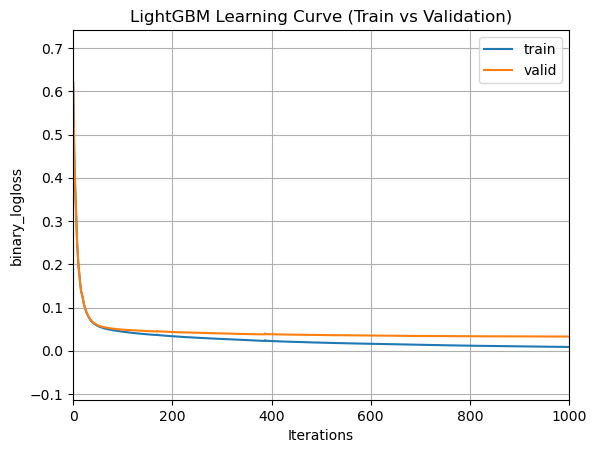

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt

# Your tuned parameters
best_params = {
    'learning_rate': 0.11560266116814345,
    'num_leaves': 197,
    'max_depth': 13,
    'feature_fraction': 0.6988054575160485,
    'bagging_fraction': 0.8554525257423733,
    'bagging_freq': 8,
    'objective': 'binary',
    'metric': ['binary_error', 'binary_logloss']
}

# Train model with both train + validation monitoring
model = lgb.LGBMClassifier(**best_params, n_estimators=1000)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],   # 👈 add training set here
    eval_names=["train", "valid"],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(100)  # print every 100 rounds
    ]
)

# Predictions
y_pred = model.predict(X_val)

# Classification report
print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_pred))

# Plot learning curve
lgb.plot_metric(model, metric='binary_logloss')
plt.title("LightGBM Learning Curve (Train vs Validation)")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get probabilities for positive class
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Compute PR curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Filter only thresholds where recall >= 0.95
valid_idxs = np.where(recalls[:-1] >= 0.98)[0]   # exclude last precision (no threshold for it)

if len(valid_idxs) > 0:
    # Among those, pick the one with the best precision
    best_idx = valid_idxs[np.argmax(precisions[valid_idxs])]
    best_threshold = thresholds[best_idx]
    best_precision = precisions[best_idx]
    best_recall = recalls[best_idx]

    print("Best Threshold:", best_threshold)
    print("Precision at Best Threshold:", best_precision)
    print("Recall at Best Threshold:", best_recall)

    # Apply threshold
    y_pred = (y_pred_proba >= best_threshold).astype(int)
else:
    print("No threshold found with recall >= 0.95")

Best Threshold: 0.7639423341687915
Precision at Best Threshold: 0.9907618217762412
Recall at Best Threshold: 0.9800278035217794


In [ ]:
# Apply chosen threshold
best_threshold = 0.7639423341687915


y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=4))

Confusion Matrix:
[[147854    986]
 [  2155 105745]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9856    0.9934    0.9895    148840
           1     0.9908    0.9800    0.9854    107900

    accuracy                         0.9878    256740
   macro avg     0.9882    0.9867    0.9874    256740
weighted avg     0.9878    0.9878    0.9878    256740

